In [7]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.linear_model
import scipy
import numpy
import matplotlib.pyplot as plt

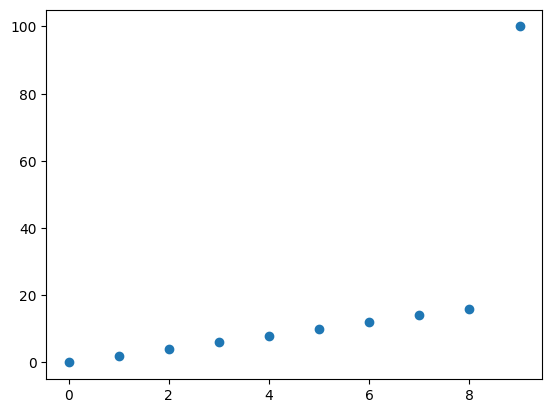

In [14]:
# Plot the points
n = 10
x = numpy.array([i for i in range(n)]).reshape(-1, 1)
y = numpy.array([2 * i for i in range(n - 1)] + [100])
plt.scatter(x, y)

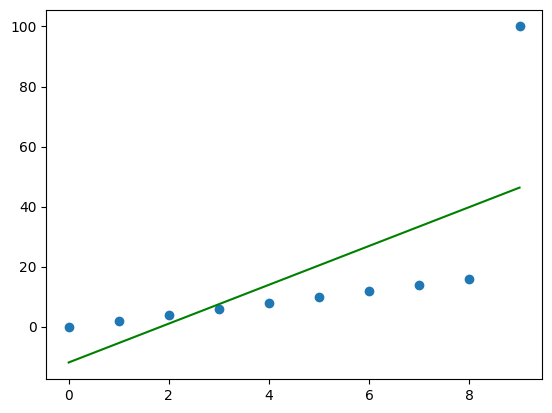

In [21]:
# Compute the regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(x, y)
y_ls = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_ls, color = "green")

In [15]:
# Create the LAD regression linear problem in the form min c'x st ax <= b
# The variabls are [weight, bias, error_1, error_2, ..., error_n].
c = numpy.array([0, 0] + [1] * n)
a1 = numpy.hstack([-x, -numpy.ones((n, 1)), -numpy.identity(n)])
a2 = numpy.hstack([x, numpy.ones((n, 1)), -numpy.identity(n)])
a = numpy.vstack([a1, a2])
b = numpy.hstack([-y, y])
c, a, b

(array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[ 0., -1., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-1., -1., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-2., -1., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0.],
        [-3., -1., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0.],
        [-4., -1., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0.],
        [-5., -1., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0.],
        [-6., -1., -0., -0., -0., -0., -0., -0., -1., -0., -0., -0.],
        [-7., -1., -0., -0., -0., -0., -0., -0., -0., -1., -0., -0.],
        [-8., -1., -0., -0., -0., -0., -0., -0., -0., -0., -1., -0.],
        [-9., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -1.],
        [ 0.,  1., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [ 1.,  1., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0.],
        [ 2.,  1., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0.],
        [ 3.,  1., -0., -0., -0., -1., -0., 

In [18]:
# Solve the dual linear program
w = scipy.optimize.linprog(c, a, b)
w

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 82.0
              x: [ 2.000e+00  0.000e+00 -0.000e+00  0.000e+00  0.000e+00
                   0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00
                   0.000e+00  8.200e+01]
            nit: 3
          lower:  residual: [ 2.000e+00  0.000e+00 -0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             -0.000e+00  0.000e+00  0.000e+00  8.200e+01]
                 marginals: [ 0.000e+00  1.600e+00  0.000e+00  1.000e+00
                              1.000e+00  1.000e+00  1.000e+00  4.000e-01
                              0.000e+00  1.000e+00  1.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf        inf        inf   

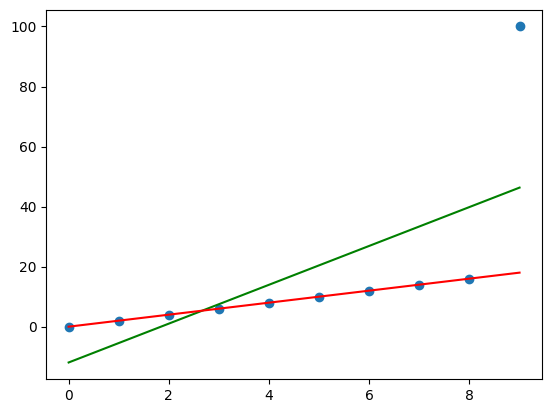

In [22]:
y_lad = x * w.x[0] + w.x[1]
plt.scatter(x, y)
plt.plot(x, y_ls, color = "green")
plt.plot(x, y_lad, color = "red")